<a href="https://colab.research.google.com/github/proflynch/Tekbac/blob/master/LSTM_TS_Forecast_Chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Long Short Term Memory Chaos Forecasting

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

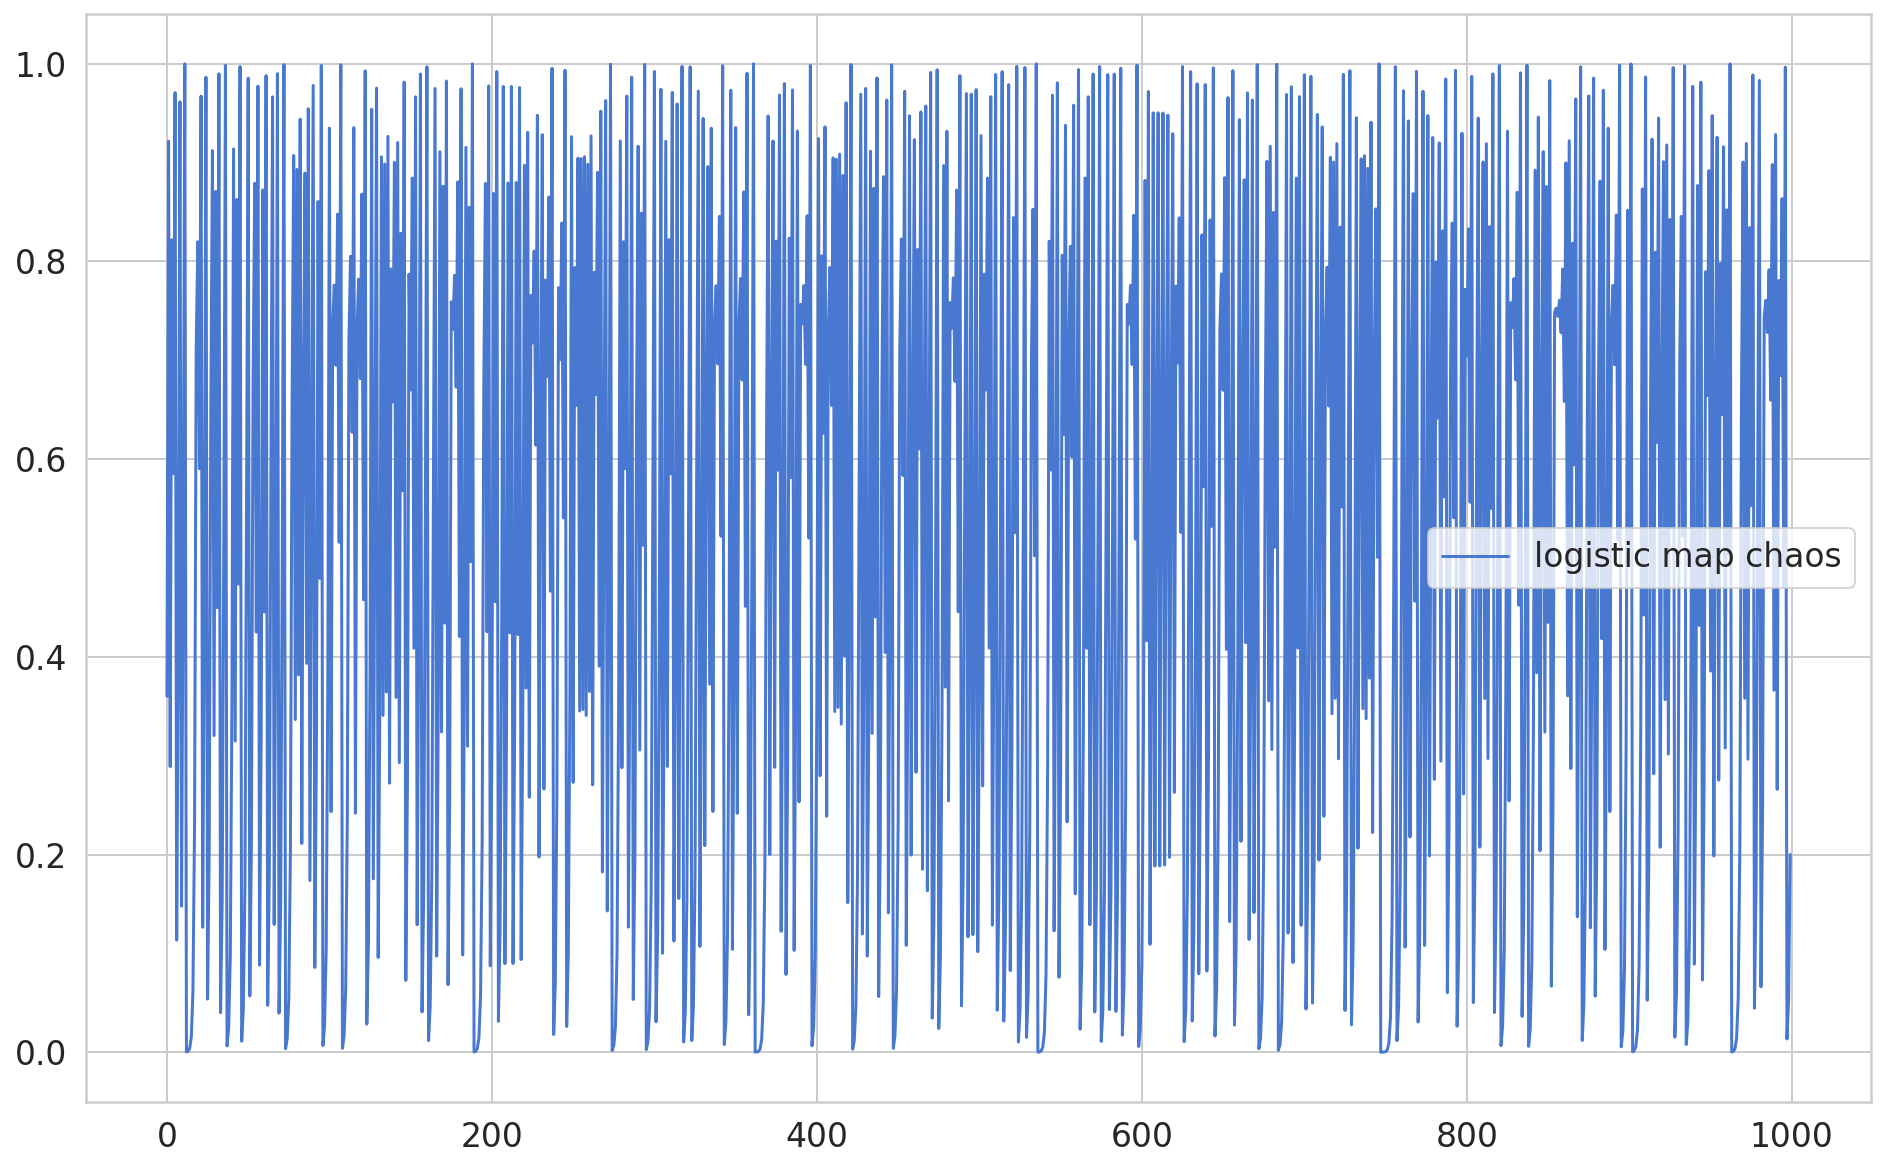

In [2]:
x = 0.1
chaos = []
for t in range(1000):
  x = 4 * x * (1 - x)
  chaos = np.append(chaos,x)

time = np.arange(0, 100, 0.1)
plt.plot(chaos, label='logistic map chaos')
plt.legend();

In [3]:
df = pd.DataFrame(dict(chaos=chaos), index=time, columns=['chaos'])
df.head()

,chaos
0.0,0.360000
0.1,0.921600
0.2,0.289014
0.3,0.821939
0.4,0.585421


In [4]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [6]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.chaos, time_steps)
X_test, y_test = create_dataset(test, test.chaos, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


In [7]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, 
                    validation_split=0.1, verbose=1, shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 [==============================] - 2s 3ms/sample - loss: 0.1569 - val_loss: 0.1285
Epoch 2/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.1289 - val_loss: 0.1261
Epoch 3/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.1266 - val_loss: 0.1250
Epoch 4/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.1252 - val_loss: 0.1249
Epoch 5/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.1245 - val_loss: 0.1252
Epoch 6/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.1241 - val_loss: 0.1251
Epoch 7/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.1235 - val_loss: 0.1249
Epoch 8/30
711/711 [==============================] - 1s 1ms/sample - loss: 0.1230 - val_loss: 0.1247
Epoch 9/30
711/711 [=========================

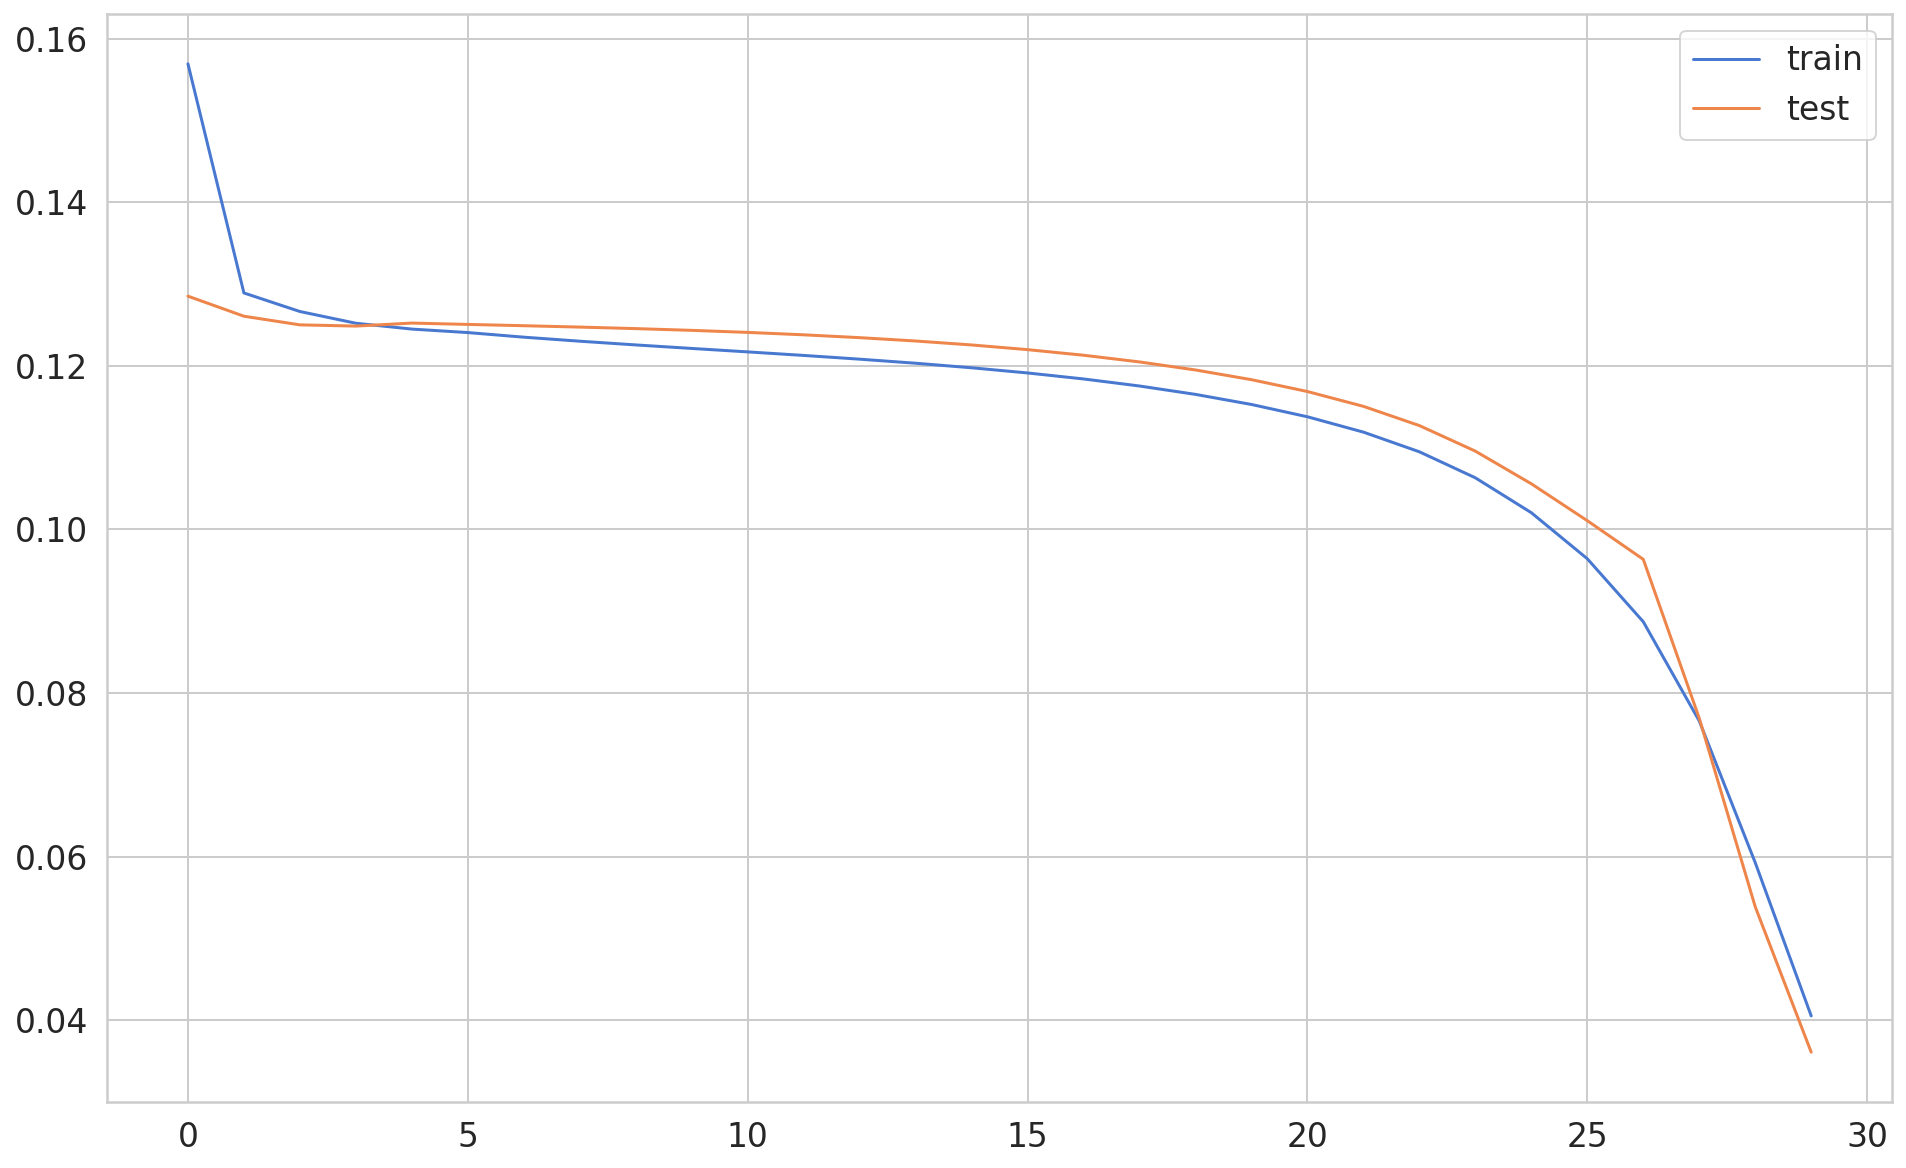

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [0]:
y_pred = model.predict(X_test)

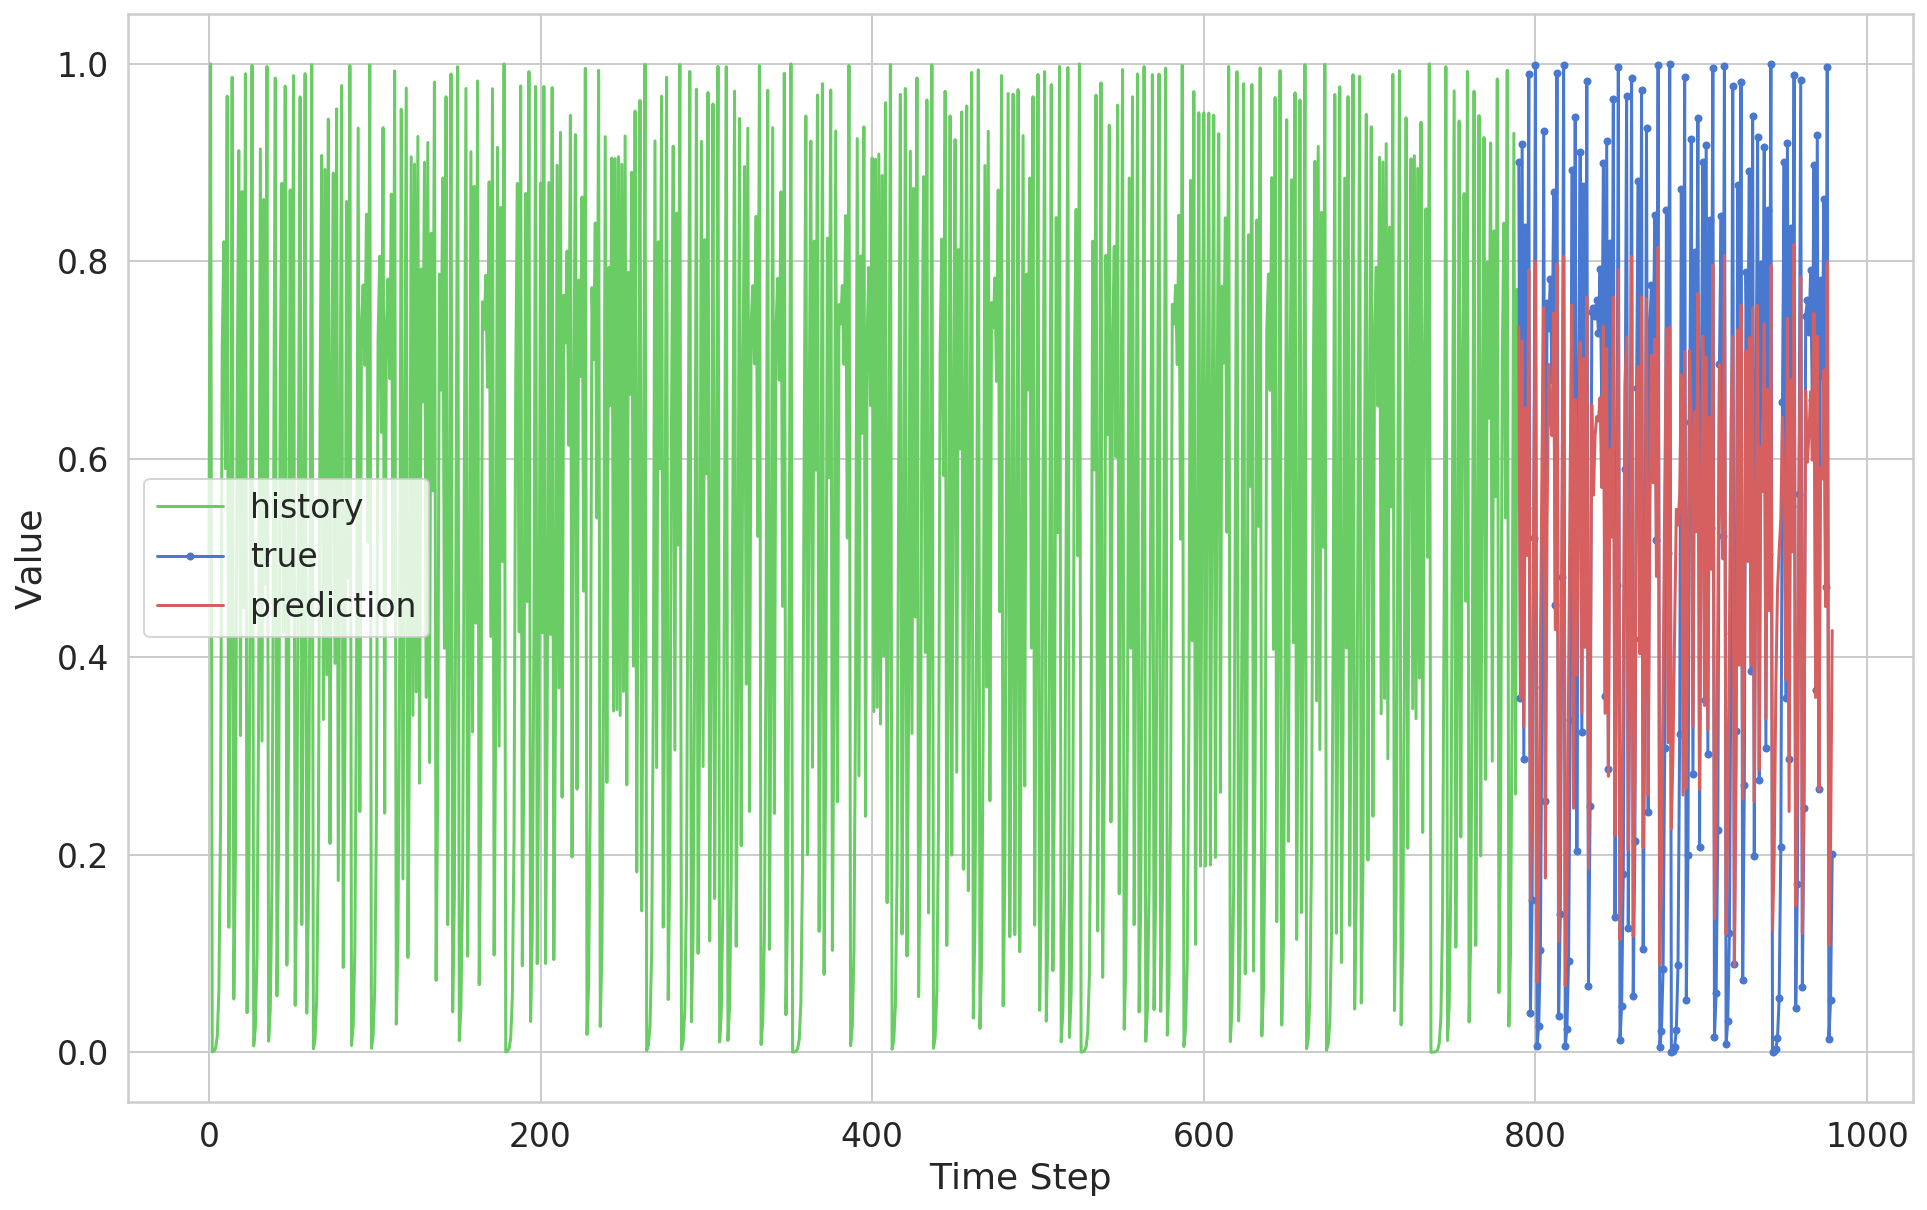

In [11]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

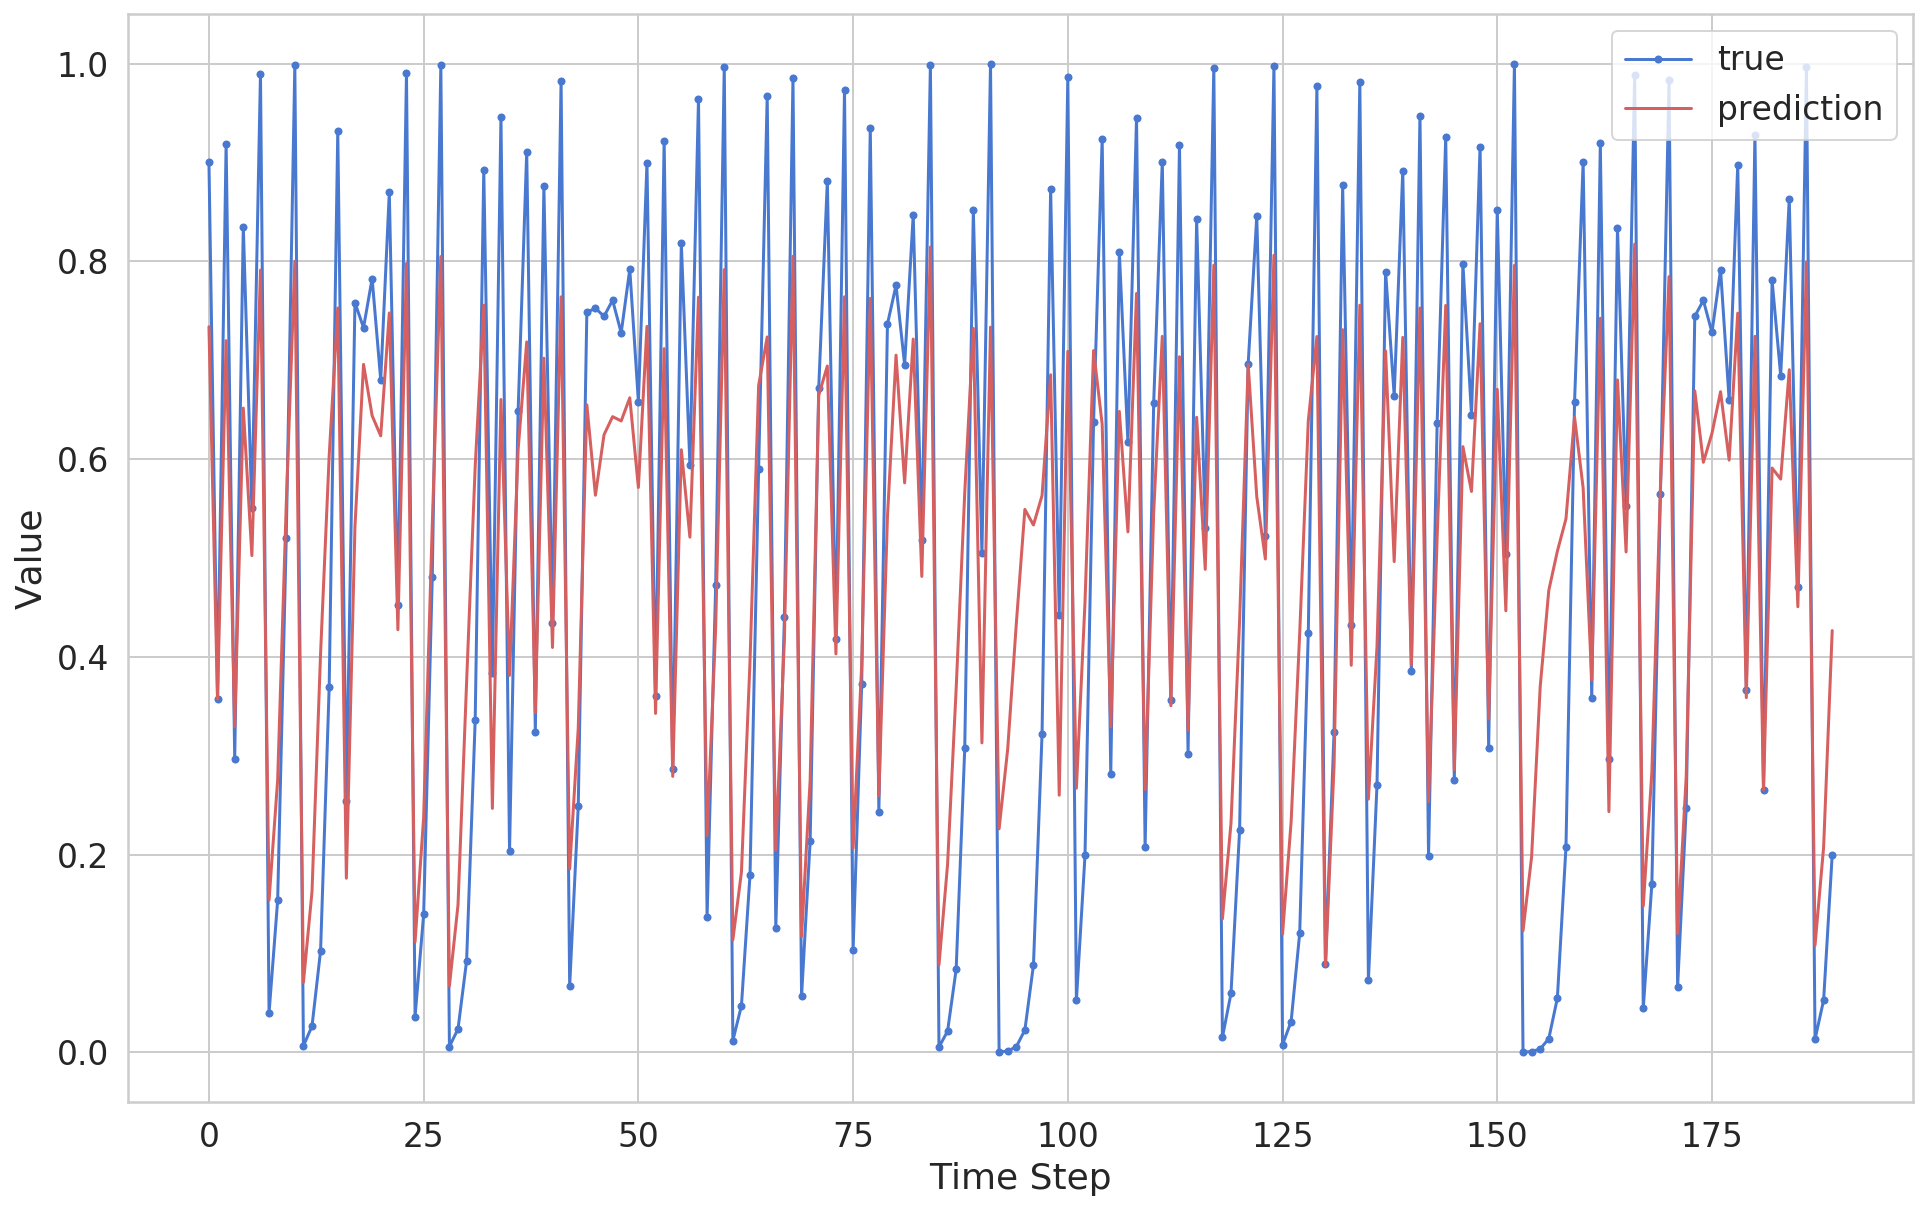

In [12]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()